In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [43]:
import warnings

In [44]:
warnings.filterwarnings('ignore')

In [45]:
conn = sqlite3.connect('/Users/banu/Downloads/pandasprojects/datasets/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])



In [46]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


What's the mean of film_rental_duration?

In [47]:
df['film_rental_duration'].mean()

4.935489902767389

What's the most common rental duration?
Show a bar plot with all the durations.

<Axes: xlabel='film_rental_duration'>

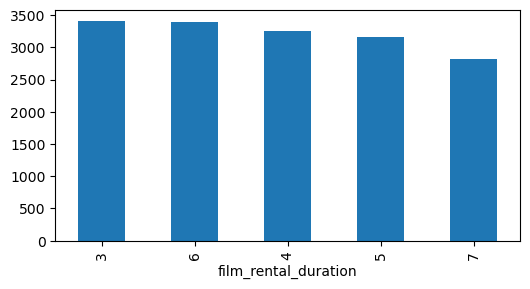

In [48]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(6,3))

What is the most common rental rate?

    Show a pie plot with all possible rental rates.
    Show a bar plot with all possible rental rates.

<Axes: ylabel='count'>

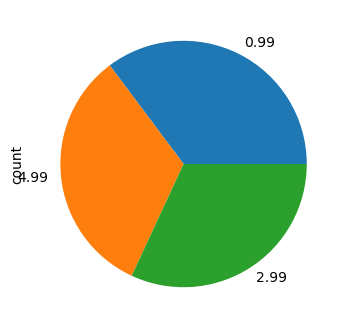

In [49]:
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(11,4))

Show a density plot of the replacement costs.
Add a red line on the mean.
Add a green line on the median median.

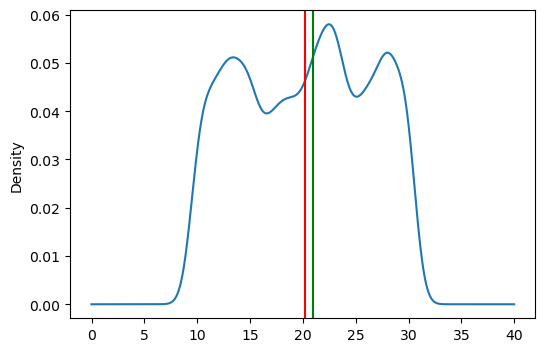

In [50]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(6,4))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

Show a grouped box plot per film rating with the film replacement costs.

<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

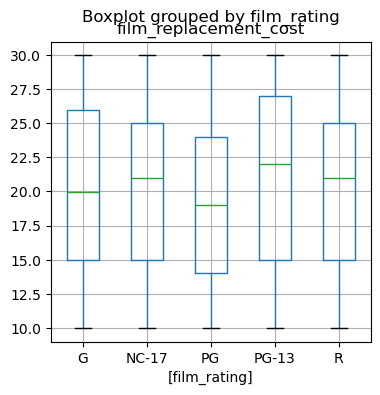

In [51]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(4,4))

Add and calculate a new rental_days column

This numeric column should have the count of days between rental_date and return_date.

In [54]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)

df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

Add and calculate a new film_daily_rental_rate column

This value should be the division of film_rental_rate by film_rental_duration.

In [55]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df['film_daily_rental_rate'].head()


rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

List 4 films with the lowest daily rental rate

In [57]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(4)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,0.141429


How many rentals were made in Lethbridge city?

In [58]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

How many rentals of each film rating were made in Lethbridge city?

Show a bar plot with each film rating count.

<Axes: xlabel='film_rating'>

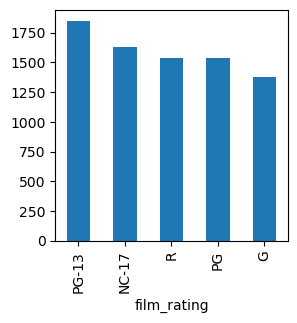

In [60]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(3,3))

How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [62]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186